In [50]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# Machine Learning
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

import os

# Webscrape Lotto Data

In [19]:
url = 'http://www.nlcbplaywhelotto.com/nlcb-lotto-plus-results/'
month = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']
Year = ['{:02d}'.format(i) for i in range(0,23)]
DATA = []
for i in Year:
    for j in month:
        params = {
            'monthyear' : f'{j}-{i}'
        }
        r = requests.get(url = url , params=params)
        try:
            df = pd.read_html(r.content)[0].dropna(how='all')
            dates = df.iloc[::2].reset_index().drop(columns=['index']).rename(columns={'Draw#':'Date'})['Date'] # Even Rows
            Data = df.iloc[1::2].reset_index().drop(columns=['index']) # Odd Rows
            df = pd.merge(dates,Data,left_index=True, right_index=True).copy()
            DATA.append(df)
        except:
            continue
df = pd.concat(DATA)

In [21]:
# Save to File 
df.to_excel('LOTTO.xlsx')

# Machine Learning

In [82]:
file_path   = os.path.join(os.getcwd(),'Data')
Filepath    = os.path.join(file_path,os.listdir(file_path)[0])

df = pd.read_excel(Filepath,header=1).drop(columns=['Unnamed: 0','Draw#']).fillna(0)
df.Date = pd.to_datetime(df.Date)

# Drop Rows with only zeros
df = df.loc[~((df[[1,2,3,4,5]]==0)).all(axis=1)]
df

,Date,1,2,3,4,5,Power Ball,Wins
0,2001-07-04,4,10,11,12,18,2,0.0
1,2001-07-07,2,10,11,26,28,10,0.0
2,2001-07-11,5,10,11,13,15,10,1.0
3,2001-07-14,9,11,24,26,33,4,0.0
4,2001-07-18,8,11,12,19,31,10,0.0
...,...,...,...,...,...,...,...,...
2120,2022-05-21,1,12,26,29,31,7,0.0
2121,2022-05-25,2,4,9,10,25,2,0.0
2122,2022-05-28,12,13,16,33,34,4,0.0
2123,2022-06-01,6,15,23,25,32,8,0.0


In [83]:
# Sort the data based on Date
ndf  = df.sort_values(by = ['Date'])

# Check if Null values exist in lotto data
print('Number of Null Values : \n', ndf.isnull().sum())
ndf.info()
ndf.describe()[[1,2,3,4,5,'Power Ball']]

Number of Null Values : 
 Date          0
1             0
2             0
3             0
4             0
5             0
Power Ball    0
Wins          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2124 entries, 0 to 2124
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2124 non-null   datetime64[ns]
 1   1           2124 non-null   int64         
 2   2           2124 non-null   int64         
 3   3           2124 non-null   int64         
 4   4           2124 non-null   int64         
 5   5           2124 non-null   int64         
 6   Power Ball  2124 non-null   int64         
 7   Wins        2124 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 149.3 KB


,1,2,3,4,5,Power Ball
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000
mean,6.165725,12.314030,18.331921,24.491996,30.488701,5.585687
std,4.803225,6.050328,6.486807,6.118429,4.753001,2.889666
min,1.000000,2.000000,4.000000,6.000000,5.000000,1.000000
25%,2.000000,7.000000,13.000000,20.000000,28.000000,3.000000
50%,5.000000,12.000000,18.000000,25.000000,32.000000,6.000000
75%,9.000000,16.000000,23.000000,29.000000,34.000000,8.000000
max,29.000000,34.000000,34.000000,35.000000,36.000000,10.000000


In [84]:
ndf

,Date,1,2,3,4,5,Power Ball,Wins
0,2001-07-04,4,10,11,12,18,2,0.0
1,2001-07-07,2,10,11,26,28,10,0.0
2,2001-07-11,5,10,11,13,15,10,1.0
3,2001-07-14,9,11,24,26,33,4,0.0
4,2001-07-18,8,11,12,19,31,10,0.0
...,...,...,...,...,...,...,...,...
2120,2022-05-21,1,12,26,29,31,7,0.0
2121,2022-05-25,2,4,9,10,25,2,0.0
2122,2022-05-28,12,13,16,33,34,4,0.0
2123,2022-06-01,6,15,23,25,32,8,0.0


In [85]:
# Function to normalize stock prices based on their initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [86]:
# plot interactive chart for stocks data
interactive_plot(ndf, 'Lotto')

In [97]:

def Draw_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[[1]].shift(-n)
  
  # return the new dataset 
  return data

Col_1_target_df = Draw_window(ndf[[1]])
Col_1_target_df
# # Remove the last row as it will be a null value
Col_1_target_df = Col_1_target_df[:-1]
Col_1_target_df
# # Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
target_scaled_df = sc.fit_transform(Col_1_target_df)

c:\Users\Suren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Users\Suren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [116]:
target_scaled_df.shape
# Creating Feature and Target
X = target_scaled_df[:,:1]
Y = target_scaled_df[:,1:]
# Converting dataframe to arrays
X = np.asarray(X)
y = np.asarray(Y)
X.shape, y.shape


((2123, 1), (2123, 1))

In [117]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((744, 1), (744, 1))

In [118]:
X_test

array([[0.        ],
       [0.14285714],
       [0.35714286],
       [0.03571429],
       [0.28571429],
       [0.28571429],
       [0.25      ],
       [0.        ],
       [0.07142857],
       [0.03571429],
       [0.03571429],
       [0.57142857],
       [0.03571429],
       [0.21428571],
       [0.46428571],
       [0.25      ],
       [0.21428571],
       [0.17857143],
       [0.03571429],
       [0.10714286],
       [0.        ],
       [0.10714286],
       [0.28571429],
       [0.        ],
       [0.10714286],
       [0.14285714],
       [0.42857143],
       [0.14285714],
       [0.03571429],
       [0.14285714],
       [0.03571429],
       [0.        ],
       [0.35714286],
       [0.64285714],
       [0.14285714],
       [0.07142857],
       [0.67857143],
       [0.        ],
       [0.17857143],
       [0.32142857],
       [0.        ],
       [0.21428571],
       [0.        ],
       [0.10714286],
       [0.07142857],
       [0.        ],
       [0.17857143],
       [0.285

In [119]:
X_train

array([[0.10714286],
       [0.03571429],
       [0.14285714],
       ...,
       [0.10714286],
       [0.17857143],
       [0.10714286]])

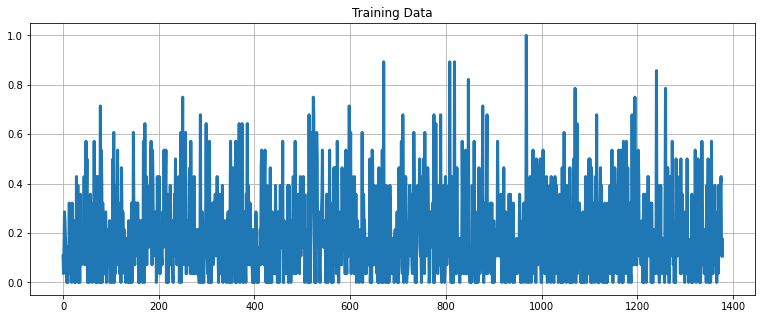

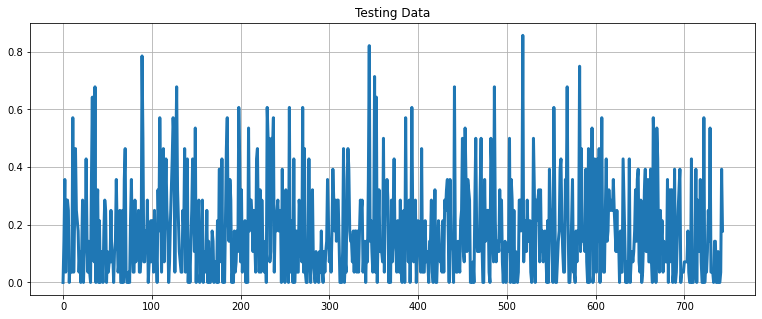

In [120]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')


In [121]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()
regression_model.fit(X_train, y_train)


Ridge()

In [129]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])
len(Predicted)
# # Append the close values to the list
close = []
for i in target_scaled_df:
  close.append(i[0])

# # Create a dataframe based on the dates in the individual stock data
df_predicted = ndf[['Date']][:-1]
df_predicted
# # Add the close values to the dataframe
df_predicted['Col 1'] = close
df_predicted
# # Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted
# # Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Linear Regression Score:  -0.006616125037222087
